<a href="https://colab.research.google.com/github/RylleLang/MANTARING_RYLLE_AIRO_CPE311N/blob/main/Copy_of_Hands_on_Activity_7_2_Webscraping_using_BeautifulSoup_and_Requests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Gthering

# Source of Data
A vast amount of historical data can be found in files such as:



*   MS Word documents
*   Emails
*   Spreadsheets
*   MS PowerPoints
*   PDFs
*   HTML
*   and plaintext files

Public and Private Archives

CSV, JSON, and XML files use plaintext, a common format, and are compatible with a wide range of applications

The Web can be mined for data using a web scraping application

The IoT uses sensors create data

Sensors in smartphones, cars, airplanes, street lamps, and home appliances capture raw data

# Open Data and Private Data

1.   Open Data

> The Open Knowledge Foundation describes Open Data as “any content, information or data that people are free to use, reuse, and redistribute without any legal, technological, or social restriction.”

2.   Private Data

> Data related to an expectation of privacy and regulated by a particular country/government


# Structured and Unstructured Data



1.   Structured Data

> Data entered and maintained in fixed fields within a file or record Easily entered, classified, queried, and analyzed Relational databases or spreadsheets

2.   Unstructured Data Lacks organization

> Raw data Photo contents, audio, video, web pages, blogs, books, journals, white papers, PowerPoint presentations, articles, email, wikis, word processing documents, and text in general

# Example of gathering image data using webcam

Note: Run this snippet using local jupyter notebook

In [1]:
import cv2
from google.colab.patches import cv2_imshow
key = cv2.waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
    try:
        check, frame = webcam.read()
        print(check) #prints true as long as the webcam is running
        print(frame) #prints matrix values of each framecd
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('s'):
            cv2.imwrite(filename='saved_img.jpg', img=frame)
            webcam.release()
            img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
            img_new = cv2.imshow("Captured Image", img_new)
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
            print("Processing image...")
            img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
            print("Converting RGB image to grayscale...")
            gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
            print("Converted RGB image to grayscale...")
            print("Resizing image to 28x28 scale...")
            img_ = cv2.resize(gray,(28,28))
            print("Resized...")
            img_resized = cv2.imwrite(filename='saved_img-final.jpg', img=img_)
            print("Image saved!")

            break
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break

    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

False
None


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


# Example of gathering voice data using microphone

 **Note: Run the snippet of codes using local jupyter notebook**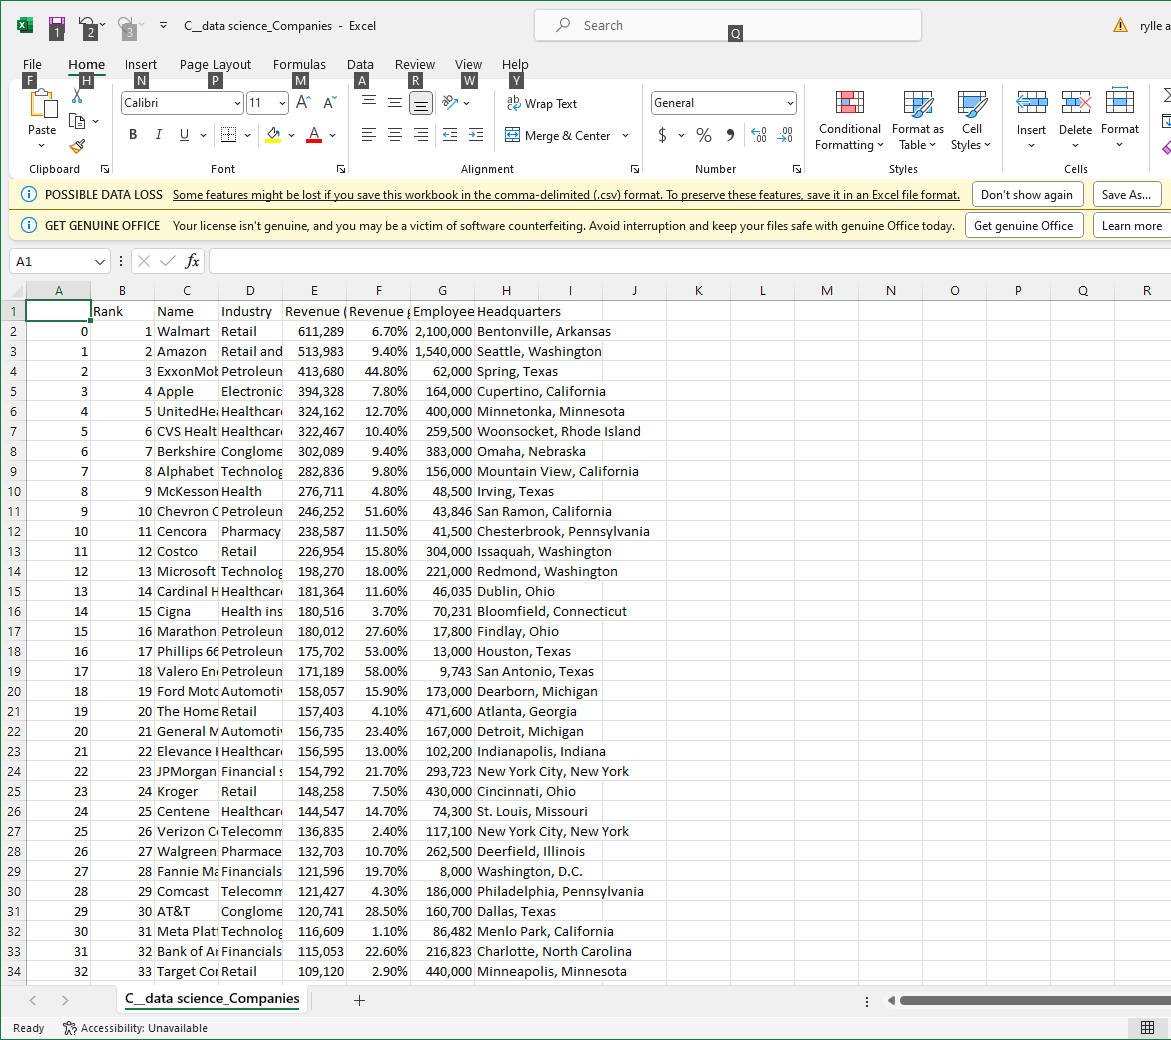

In [2]:
!pip3 install sounddevice

In [3]:
!pip3 install wavio

In [4]:
!pip3 install scipy

In [5]:
!apt-get install libportaudio2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 65.3 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Fetched 65.3 kB in 0s (176 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1.1) ...
Setting up libportaudio2:amd64 (19.6.0-1.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtb

In [13]:
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

freq = 44100
duration = 5

recording = sd.rec(int(duration * freq), samplerate = freq, channels=2)
sd.wait()

write("recording0.wav", freq, recording)

wv.write("recording1.wav", recording, freq, sampwidth=2)

PortAudioError: Error querying device -1

# Web Scraping
 Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. The web scraping software may directly access the World
 Wide Web using the Hypertext Transfer Protocol or a web browser. While web scraping can be done manually by a software user, the term typically refers to automated
 processes implemented using a bot or web crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a central local database or
 spreadsheet, for later retrieval or analysis

# Image Scraping using BeautifulSoup and Request

In [14]:
!pip install bs4

In [15]:
pip install requests

In [16]:
import requests
from bs4 import BeautifulSoup

def getdata(url):
    r = requests.get(url)
    return r.text

htmldata = getdata("https://www.google.com/")
soup = BeautifulSoup(htmldata, 'html.parser')
for item in soup.find_all('img'):
    print(item['src'])

/images/branding/googlelogo/1x/googlelogo_white_background_color_272x92dp.png


In [17]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00


# Image Scraping using Selenium
 Note: Run the snippet of code using local jupyter notebook

In [18]:
pip install jupyterlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: jupyter-client
  

In [1]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
import time
import requests
import shutil
import os
import getpass
import urllib.request
import io
import time
from PIL import Image
user = getpass.getuser()
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
search_url = "https://www.google.com/search?q={q}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568"
driver.get(search_url.format(q='Car'))
def scroll_to_end(driver):
   driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
   time.sleep(5)#sleep_between_interactions

def getImageUrls(name,totalImgs,driver):

    search_url = "https://www.google.com/search?q={q}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568"
    driver.get(search_url.format(q=name))
    img_urls = set()
    img_count = 0
    results_start = 0

    while(img_count<totalImgs): #Extract actual images now

        scroll_to_end(driver)

        thumbnail_results = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
        totalResults=len(thumbnail_results)
        print(f"Found: {totalResults} search results. Extracting links from{results_start}:{totalResults}")

        for img in thumbnail_results[results_start:totalResults]:

            img.click()
            time.sleep(2)
            actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                    img_urls.add(actual_image.get_attribute('src'))

            img_count=len(img_urls)

            if img_count >= totalImgs:
                print(f"Found: {img_count} image links")
                break
            else:
                print("Found:", img_count, "looking for more image links ...")
                load_more_button = driver.find_element_by_css_selector(".mye4qd")
                driver.execute_script("document.querySelector('.mye4qd').click();")
                results_start = len(thumbnail_results)
    return img_urls
def downloadImages(folder_path,file_name,url):
    try:

        image_content = requests.get(url).content
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")
    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')

        file_path = os.path.join(folder_path, file_name)

        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

def saveInDestFolder(searchNames,destDir,totalImgs,driver):
    for name in list(searchNames):
        path=os.path.join(destDir,name)
        if not os.path.isdir(path):
            os.mkdir(path)
        print('Current Path',path)
        totalLinks=getImageUrls(name,totalImgs,driver)
        print('totalLinks',totalLinks)
    if totalLinks is None:
            print('images not found for :',name)

    else:
        for i, link in enumerate(totalLinks):
            file_name = f"{i:150}.jpg"
            downloadImages(path,file_name,link)

searchNames=['cat']
destDir=f'/content/drive/My Drive/Colab Notebooks/Dataset/'
totalImgs=5
saveInDestFolder(searchNames,destDir,totalImgs,driver)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [773 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,898 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu j

TypeError: WebDriver.__init__() got an unexpected keyword argument 'chrome_options'

# Web Scraping of Movies Information using BeautifulSoup
 We want to analyze the distributions of IMDB and Metacritic movie ratings to see if we find anything interesting. To do this, weʼll first scrape data for over 2000 movies.




# Identifying the URL structure
 **In the image above, you can see that the URL has several parameters after the question mark:**



*   release_date — Shows only the movies released in a specific year.
*   sort — Sorts the movies on the page. sort=num_votes,desc translates to sort by number of votes in a descending order.
*   page — Specifies the page number.
*   ref_ — Takes us to the the next or the previous page. The reference is the page we are currently on. adv_nxt and adv_prv are two possible values. They translate to
 advance to the next page, and advance to the previous page, respectivel



In [14]:
from requests import get
url = 'https://www.imdb.com/search/title/?release_date=2017-01-01,2017-12-31&sort=num_votes,desc'
response = get(url)
print(response.text[:500])

<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>



# Using BeautifulSoup to parse the HTML content
**To parse our HTML document and extract the 50 div containers, weʼll use a Python module called BeautifulSoup, the most common web scraping module for Python.
 In the following code cell we will:**


*   Import the BeautifulSoup class creator from the package bs4.
*   Parse response.text by creating a BeautifulSoup object, and assign this object to html_soup. The 'html.parser' argument indicates that we want to do the parsing using
 Pythonʼs built-in HTML parser.




In [15]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
headers = {'Accept-Language': 'en-US,en;q=0.8'}
type(html_soup)

bs4.BeautifulSoup

 **Now letʼs use the find_all() method to extract all the div containers that have a class attribute of lister-item mode-advanced:**

In [17]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
0


find_all() returned a ResultSet object which is a list containing all the 50 divs we are interested in.

Now weʼll select only the first container, and extract, by turn, each item of interest:



*   The name of the movie.
*   The year of release.
*   The IMDB rating.
*   The Metascore.
*   The number of votes.



Extracting the data for a single movie
 We can access the first container, which contains information about a single movie, by using list notation on movie_containers

In [18]:
first_movie = movie_containers[0]
first_movie

IndexError: list index out of range

In [19]:
first_movie.div

NameError: name 'first_movie' is not defined

In [20]:
first_movie.a

NameError: name 'first_movie' is not defined

In [21]:
first_movie.h3

NameError: name 'first_movie' is not defined

In [22]:
first_movie.h3.a

NameError: name 'first_movie' is not defined

In [23]:
first_name = first_movie.h3.a.text
first_name

NameError: name 'first_movie' is not defined

In [25]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

NameError: name 'first_movie' is not defined

In [26]:
first_year = first_year.text
first_year

NameError: name 'first_year' is not defined

# The IMDB rating

In [27]:
first_movie.strong

NameError: name 'first_movie' is not defined

In [28]:
first_imdb = float(first_movie.strong.text)
first_imdb

NameError: name 'first_movie' is not defined

# The Metascore

In [29]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

NameError: name 'first_movie' is not defined

# The number of votes

In [30]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

NameError: name 'first_movie' is not defined

In [31]:
first_votes['data-value']

NameError: name 'first_votes' is not defined

In [32]:
first_votes = int(first_votes['data-value'])

NameError: name 'first_votes' is not defined

# The script

In [33]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:

#If the movie has Metascore, then extract:
   if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
     name = container.h3.a.text
     names.append(name)
# The year
     year = container.h3.find('span', class_ = 'lister-item-year').text
     years.append(year)
 # The IMDB rating
     imdb = float(container.strong.text)
     imdb_ratings.append(imdb)
 # The Metascore
     m_score = container.find('span', class_ = 'metascore').text
     metascores.append(int(m_score))
 # The number of votes
     vote = container.find('span', attrs = {'name':'nv'})['data-value']
     votes.append(int(vote))

In [34]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(test_df.info())
test_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      0 non-null      float64
 1   year       0 non-null      float64
 2   imdb       0 non-null      float64
 3   metascore  0 non-null      float64
 4   votes      0 non-null      float64
dtypes: float64(5)
memory usage: 124.0 bytes
None


,movie,year,imdb,metascore,votes


In [35]:
from time import time
from time import sleep
from random import randint
from IPython.core.display import clear_output
pages = [ '1','2','3','4','5']
years_url = [ '2017', '2018', '2019', '2020']
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
 # Preparing the monitoring of the loop
start_time = time()
requests = 0
# For every year in the interval 2000-2017
for year_url in years_url:
   # For every page in the interval 1-4
   for page in pages:
       # Make a get request
       response = get('https://www.imdb.com/search/title?release_date=' + year_url +
       '&sort=num_votes,desc&page=' + page, headers = headers)
       # Pause the loop
       sleep(randint(8,15))
       # Monitor the requests
       requests += 1
       elapsed_time = time() - start_time
       print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
       clear_output(wait = True)
       # Throw a warning for non-200 status codes
       if response.status_code != 200:
           warn('Request: {}; Status code: {}'.format(requests, response.status_code))
       # Break the loop if the number of requests is greater than expected
       if requests > 72:
           warn('Number of requests was greater than expected.')
           break
       # Parse the content of the request with BeautifulSoup
       page_html = BeautifulSoup(response.text, 'html.parser')
       # Select all the 50 movie containers from a single page
       mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
       # For every movie of these 50
       for container in mv_containers:
           # If the movie has a Metascore, then:
           if container.find('div', class_ = 'ratings-metascore') is not None:
            # Scrape the name
                name = container.h3.a.text
                names.append(name)
                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)
                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)
                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))
                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

NameError: name 'warn' is not defined

In [37]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      0 non-null      float64
 1   year       0 non-null      float64
 2   imdb       0 non-null      float64
 3   metascore  0 non-null      float64
 4   votes      0 non-null      float64
dtypes: float64(5)
memory usage: 124.0 bytes
None


,movie,year,imdb,metascore,votes


In [38]:
movie_ratings.tail(10)

,movie,year,imdb,metascore,votes


In [39]:
 movie_ratings.to_csv('/content/drive/My Drive/Colab Notebooks/Dataset/movie_ratings.csv')

OSError: Cannot save file into a non-existent directory: '/content/drive/My Drive/Colab Notebooks/Dataset'

# Data Preparation


*   Collected data may not be compatible or formatted correctly
*   Data must be prepared before it can be added to a data set
*   Extract, Transform and Load (ETL)

> process for collecting data from a variety of sources, transforming the data, and then loading the data into a database

 **Data preprocessing**

 Data Processing is a process of cleaning the raw data i.e. the data is collected in the real world and is converted to a clean data set. In other words, whenever the data is
 gathered from different sources it is collected in a raw format and this data isnʼt feasible for the analysis. Therefore, certain steps are executed to convert the data into a small
 clean data set, this part of the process is called as data preprocessing.

 Most of the real-world data is messy, some of these types of data are: 1. Missing data: Missing data can be found when it is not continuously created or due to technical
 issues in the application (IOT system). 2. Noisy Data This type of data is also called outliners, this can occur due to human errors (human manually gathering the data) or
 some technical problem of the device at the time of collection of data. 3. Inconsistent data: This type of data might be collected due to human errors (mistakes with the
 name or values) or duplication of data.

  These are some of the basic pre processing techniques that can be used to convert raw data. 1. Conversion of data: As we know that Machine Learning models can only
 handle numeric features, hence categorical and ordinal data must be somehow converted into numeric features. 2. Ignoring the missing values: Whenever we encounter
 missing data in the data set then we can remove the row or column of data depending on our need. This method is known to be efficient but it shouldnʼt be performed if there
 are a lot of missing values in the dataset. 3. Filling the missing values: Whenever we encounter missing data in the data set then we can fill the missing data manually, most
 commonly the mean, median or highest frequency value is used.



1.    **Machine learning:** If we have some missing data then we can predict what data shall be present at the empty position by using the existing data. 5. Outliers

 **detection:** There are some error data that might be present in our data set that deviates drastically from other observations in a data set. [Example: human weight = 800
 Kg; due to mistyping of extra 0]

**Example of Data Preparation of movie_rating.csv**



In [40]:
movie_ratings['year'].unique()

array([], dtype=float64)

In [41]:
movie_ratings.dtypes

movie        float64
year         float64
imdb         float64
metascore    float64
votes        float64
dtype: object

In [42]:
 movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace('(I)','')))

In [43]:
 movie_ratings['year'].unique()

array([], dtype=float64)

In [44]:
 movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace('(II)','')))

In [45]:
 movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace('(III)','')))

In [46]:
movie_ratings['year'].unique()

array([], dtype=float64)

In [47]:
 movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace('(','')))

In [48]:
 movie_ratings['year'].unique()

array([], dtype=float64)

In [49]:
 movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace(')','')))

In [50]:
movie_ratings['year'].unique()

array([], dtype=float64)

In [51]:
movie_ratings['year'] = movie_ratings['year'].astype(int)

In [52]:
movie_ratings['year'].unique()

array([], dtype=int64)

In [53]:
 movie_ratings.dtypes

movie        float64
year           int64
imdb         float64
metascore    float64
votes        float64
dtype: object

In [54]:
movie_ratings.head(10)

,movie,year,imdb,metascore,votes


In [55]:
movie_ratings.tail(10)

,movie,year,imdb,metascore,votes


In [56]:
movie_ratings

,movie,year,imdb,metascore,votes


# MY CHOOSEN WEBSITE

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [3]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vec

In [ ]:
<table class="wikitable sortable jquery-tablesorter">
<caption>
</caption>
<thead><tr>
<th class="headerSort headerSortUp" tabindex="0" role="columnheader button" title="Sort descending">Rank
</th>
<th class="headerSort" tabindex="0" role="columnheader button" title="Sort ascending">Name
</th>
<th class="headerSort" tabindex="0" role="columnheader button" title="Sort ascending">Industry
</th>
<th class="headerSort" tabindex="0" role="columnheader button" title="Sort ascending">Revenue <br>(USD millions)
</th>
<th class="headerSort" tabindex="0" role="columnheader button" title="Sort ascending">Revenue growth
</th>
<th class="headerSort" tabindex="0" role="columnheader button" title="Sort ascending">Employees
</th>
<th class="headerSort" tabindex="0" role="columnheader button" title="Sort ascending">Headquarters
</th></tr></thead><tbody>



































































































<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.7%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansas" title="Bentonville, Arkansas">Bentonville, Arkansas</a>
</td></tr><tr>
<td>2
</td>
<td><a href="/wiki/Amazon_(company)" title="Amazon (company)">Amazon</a>
</td>
<td>Retail and <a href="/wiki/Cloud_computing" title="Cloud computing">cloud computing</a>
</td>
<td style="text-align:center;">513,983
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 9.4%
</td>
<td style="text-align:center;">1,540,000
</td>
<td><a href="/wiki/Seattle" title="Seattle">Seattle, Washington</a>
</td></tr><tr>
<td>3
</td>
<td><a href="/wiki/ExxonMobil" title="ExxonMobil">ExxonMobil</a>
</td>
<td><a href="/wiki/Petroleum_industry" title="Petroleum industry">Petroleum industry</a>
</td>
<td style="text-align:center;">413,680
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 44.8%
</td>
<td style="text-align:center;">62,000
</td>
<td><a href="/wiki/Spring,_Texas" title="Spring, Texas">Spring, Texas</a>
</td></tr><tr>
<td>4
</td>
<td><a href="/wiki/Apple_Inc" class="mw-redirect" title="Apple Inc">Apple</a>
</td>
<td><a href="/wiki/Electronics_industry" title="Electronics industry">Electronics industry</a>
</td>
<td style="text-align:center;">394,328
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 7.8%
</td>
<td style="text-align:center;">164,000
</td>
<td><a href="/wiki/Cupertino,_California" title="Cupertino, California">Cupertino, California</a>
</td></tr><tr>
<td>5
</td>
<td><a href="/wiki/UnitedHealth_Group" title="UnitedHealth Group">UnitedHealth Group</a>
</td>
<td><a href="/wiki/Healthcare" class="mw-redirect" title="Healthcare">Healthcare</a>
</td>
<td style="text-align:center;">324,162
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 12.7%
</td>
<td style="text-align:center;">400,000
</td>
<td><a href="/wiki/Minnetonka,_Minnesota" title="Minnetonka, Minnesota">Minnetonka, Minnesota</a>
</td></tr><tr>
<td>6
</td>
<td><a href="/wiki/CVS_Health" title="CVS Health">CVS Health</a>
</td>
<td>Healthcare
</td>
<td style="text-align:center;">322,467
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 10.4%
</td>
<td style="text-align:center;">259,500
</td>
<td><a href="/wiki/Woonsocket,_Rhode_Island" title="Woonsocket, Rhode Island">Woonsocket, Rhode Island</a>
</td></tr><tr>
<td>7
</td>
<td><a href="/wiki/Berkshire_Hathaway" title="Berkshire Hathaway">Berkshire Hathaway</a>
</td>
<td><a href="/wiki/Conglomerate_(company)" title="Conglomerate (company)">Conglomerate</a>
</td>
<td style="text-align:center;">302,089
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 9.4%
</td>
<td style="text-align:center;">383,000
</td>
<td><a href="/wiki/Omaha,_Nebraska" title="Omaha, Nebraska">Omaha, Nebraska</a>
</td></tr><tr>
<td>8
</td>
<td><a href="/wiki/Alphabet_Inc" class="mw-redirect" title="Alphabet Inc">Alphabet</a>
</td>
<td><a href="/wiki/Technology" title="Technology">Technology</a> and cloud computing
</td>
<td style="text-align:center;">282,836
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 9.8%
</td>
<td style="text-align:center;">156,000
</td>
<td><a href="/wiki/Mountain_View,_California" title="Mountain View, California">Mountain View, California</a>
</td></tr><tr>
<td>9
</td>
<td><a href="/wiki/McKesson_Corporation" title="McKesson Corporation">McKesson Corporation</a>
</td>
<td>Health
</td>
<td style="text-align:center;">276,711
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 4.8%
</td>
<td style="text-align:center;">48,500
</td>
<td><a href="/wiki/Irving,_Texas" title="Irving, Texas">Irving, Texas</a>
</td></tr><tr>
<td>10
</td>
<td><a href="/wiki/Chevron_Corporation" title="Chevron Corporation">Chevron Corporation</a>
</td>
<td>Petroleum industry
</td>
<td style="text-align:center;">246,252
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 51.6%
</td>
<td style="text-align:center;">43,846
</td>
<td><a href="/wiki/San_Ramon,_California" title="San Ramon, California">San Ramon, California</a>
</td></tr><tr>
<td>11
</td>
<td><a href="/wiki/AmerisourceBergen" class="mw-redirect" title="AmerisourceBergen">AmerisourceBergen</a>
</td>
<td><a href="/w/index.php?title=Pharmacy_wholesale&amp;action=edit&amp;redlink=1" class="new" title="Pharmacy wholesale (page does not exist)">Pharmacy wholesale</a>
</td>
<td style="text-align:center;">238,587
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 11.5%
</td>
<td style="text-align:center;">41,500
</td>
<td><a href="/wiki/Chesterbrook,_Pennsylvania" title="Chesterbrook, Pennsylvania">Chesterbrook, Pennsylvania</a>
</td></tr><tr>
<td>12
</td>
<td><a href="/wiki/Costco" title="Costco">Costco</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">226,954
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 15.8%
</td>
<td style="text-align:center;">304,000
</td>
<td><a href="/wiki/Issaquah,_Washington" title="Issaquah, Washington">Issaquah, Washington</a>
</td></tr><tr>
<td>13
</td>
<td><a href="/wiki/Microsoft" title="Microsoft">Microsoft</a>
</td>
<td>Technology and cloud computing
</td>
<td style="text-align:center;">198,270
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 18.0%
</td>
<td style="text-align:center;">221,000
</td>
<td><a href="/wiki/Redmond,_Washington" title="Redmond, Washington">Redmond, Washington</a>
</td></tr><tr>
<td>14
</td>
<td><a href="/wiki/Cardinal_Health" title="Cardinal Health">Cardinal Health</a>
</td>
<td>Healthcare
</td>
<td style="text-align:center;">181,364
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 11.6%
</td>
<td style="text-align:center;">46,035
</td>
<td><a href="/wiki/Dublin,_Ohio" title="Dublin, Ohio">Dublin, Ohio</a>
</td></tr><tr>
<td>15
</td>
<td><a href="/wiki/Cigna" title="Cigna">Cigna</a>
</td>
<td>Health insurance
</td>
<td style="text-align:center;">180,516
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 3.7%
</td>
<td style="text-align:center;">70,231
</td>
<td><a href="/wiki/Bloomfield,_Connecticut" title="Bloomfield, Connecticut">Bloomfield, Connecticut</a>
</td></tr><tr>
<td>16
</td>
<td><a href="/wiki/Marathon_Petroleum" title="Marathon Petroleum">Marathon Petroleum</a>
</td>
<td>Petroleum industry
</td>
<td style="text-align:center;">180,012
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 27.6%
</td>
<td style="text-align:center;">17,800
</td>
<td><a href="/wiki/Findlay,_Ohio" title="Findlay, Ohio">Findlay, Ohio</a>
</td></tr><tr>
<td>17
</td>
<td><a href="/wiki/Phillips_66" title="Phillips 66">Phillips 66</a>
</td>
<td>Petroleum industry
</td>
<td style="text-align:center;">175,702
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 53.0%
</td>
<td style="text-align:center;">13,000
</td>
<td><a href="/wiki/Houston" title="Houston">Houston, Texas</a>
</td></tr><tr>
<td>18
</td>
<td><a href="/wiki/Valero_Energy" title="Valero Energy">Valero Energy</a>
</td>
<td>Petroleum industry
</td>
<td style="text-align:center;">171,189
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 58.0%
</td>
<td style="text-align:center;">9,743
</td>
<td><a href="/wiki/San_Antonio" title="San Antonio">San Antonio, Texas</a>
</td></tr><tr>
<td>19
</td>
<td><a href="/wiki/Ford_Motor_Company" title="Ford Motor Company">Ford Motor Company</a>
</td>
<td><a href="/wiki/Automotive_industry" title="Automotive industry">Automotive industry</a>
</td>
<td style="text-align:center;">158,057
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 15.9%
</td>
<td style="text-align:center;">173,000
</td>
<td><a href="/wiki/Dearborn,_Michigan" title="Dearborn, Michigan">Dearborn, Michigan</a>
</td></tr><tr>
<td>20
</td>
<td><a href="/wiki/The_Home_Depot" title="The Home Depot">The Home Depot</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">157,403
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 4.1%
</td>
<td style="text-align:center;">471,600
</td>
<td><a href="/wiki/Atlanta" title="Atlanta">Atlanta, Georgia</a>
</td></tr><tr>
<td>21
</td>
<td><a href="/wiki/General_Motors" title="General Motors">General Motors</a>
</td>
<td>Automotive industry
</td>
<td style="text-align:center;">156,735
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 23.4%
</td>
<td style="text-align:center;">167,000
</td>
<td><a href="/wiki/Detroit" title="Detroit">Detroit, Michigan</a>
</td></tr><tr>
<td>22
</td>
<td><a href="/wiki/Anthem_(company)" class="mw-redirect" title="Anthem (company)">Elevance Health</a>
</td>
<td>Healthcare
</td>
<td style="text-align:center;">156,595
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 13.0%
</td>
<td style="text-align:center;">102,200
</td>
<td><a href="/wiki/Indianapolis" title="Indianapolis">Indianapolis, Indiana</a>
</td></tr><tr>
<td>23
</td>
<td><a href="/wiki/JPMorgan_Chase" title="JPMorgan Chase">JPMorgan Chase</a>
</td>
<td><a href="/wiki/Financial_services" title="Financial services">Financial services</a>
</td>
<td style="text-align:center;">154,792
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 21.7%
</td>
<td style="text-align:center;">293,723
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City, New York</a>
</td></tr><tr>
<td>24
</td>
<td><a href="/wiki/Kroger" title="Kroger">Kroger</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">148,258
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 7.5%
</td>
<td style="text-align:center;">430,000
</td>
<td><a href="/wiki/Cincinnati" title="Cincinnati">Cincinnati, Ohio</a>
</td></tr><tr>
<td>25
</td>
<td><a href="/wiki/Centene" class="mw-redirect" title="Centene">Centene</a>
</td>
<td>Healthcare
</td>
<td style="text-align:center;">144,547
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 14.7%
</td>
<td style="text-align:center;">74,300
</td>
<td><a href="/wiki/St._Louis" title="St. Louis">St. Louis, Missouri</a>
</td></tr><tr>
<td>26
</td>
<td><a href="/wiki/Verizon_Communications" class="mw-redirect" title="Verizon Communications">Verizon Communications</a>
</td>
<td>Telecommunications
</td>
<td style="text-align:center;">136,835
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 2.4%
</td>
<td style="text-align:center;">117,100
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City, New York</a>
</td></tr><tr>
<td>27
</td>
<td><a href="/wiki/Walgreens_Boots_Alliance" title="Walgreens Boots Alliance">Walgreens Boots Alliance</a>
</td>
<td>Pharmaceutical industry
</td>
<td style="text-align:center;">132,703
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Decrease"><img alt="Decrease" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 10.7%
</td>
<td style="text-align:center;">262,500
</td>
<td><a href="/wiki/Deerfield,_Illinois" title="Deerfield, Illinois">Deerfield, Illinois</a>
</td></tr><tr>
<td>28
</td>
<td><a href="/wiki/Fannie_Mae" title="Fannie Mae">Fannie Mae</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">121,596
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 19.7%
</td>
<td style="text-align:center;">8,000
</td>
<td><a href="/wiki/Washington,_D.C." title="Washington, D.C.">Washington, D.C.</a>
</td></tr><tr>
<td>29
</td>
<td><a href="/wiki/Comcast" title="Comcast">Comcast</a>
</td>
<td>Telecommunications
</td>
<td style="text-align:center;">121,427
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 4.3%
</td>
<td style="text-align:center;">186,000
</td>
<td><a href="/wiki/Philadelphia" title="Philadelphia">Philadelphia, Pennsylvania</a>
</td></tr><tr>
<td>30
</td>
<td><a href="/wiki/AT%26T" title="AT&amp;T">AT&amp;T</a>
</td>
<td><a href="/wiki/Conglomerate_(company)" title="Conglomerate (company)">Conglomerate</a> and telecomunications
</td>
<td style="text-align:center;">120,741
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Decrease"><img alt="Decrease" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 28.5%
</td>
<td style="text-align:center;">160,700
</td>
<td><a href="/wiki/Dallas" title="Dallas">Dallas, Texas</a>
</td></tr><tr>
<td>31
</td>
<td><a href="/wiki/Meta_Platforms" title="Meta Platforms">Meta Platforms</a>
</td>
<td>Technology
</td>
<td style="text-align:center;">116,609
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Decrease"><img alt="Decrease" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 1.1%
</td>
<td style="text-align:center;">86,482
</td>
<td><a href="/wiki/Menlo_Park,_California" title="Menlo Park, California">Menlo Park, California</a>
</td></tr><tr>
<td>32
</td>
<td><a href="/wiki/Bank_of_America" title="Bank of America">Bank of America</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">115,053
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 22.6%
</td>
<td style="text-align:center;">216,823
</td>
<td><a href="/wiki/Charlotte,_North_Carolina" title="Charlotte, North Carolina">Charlotte, North Carolina</a>
</td></tr><tr>
<td>33
</td>
<td><a href="/wiki/Target_Corporation" title="Target Corporation">Target Corporation</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">109,120
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 2.9%
</td>
<td style="text-align:center;">440,000
</td>
<td><a href="/wiki/Minneapolis" title="Minneapolis">Minneapolis, Minnesota</a>
</td></tr><tr>
<td>34
</td>
<td><a href="/wiki/Dell_Technologies" title="Dell Technologies">Dell Technologies</a>
</td>
<td>Technology
</td>
<td style="text-align:center;">102,301
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Decrease"><img alt="Decrease" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 4.4%
</td>
<td style="text-align:center;">133,000
</td>
<td><a href="/wiki/Round_Rock,_Texas" title="Round Rock, Texas">Round Rock, Texas</a>
</td></tr><tr>
<td>35
</td>
<td><a href="/wiki/Archer_Daniels_Midland" class="mw-redirect" title="Archer Daniels Midland">Archer Daniels Midland</a>
</td>
<td><a href="/wiki/Food_industry" title="Food industry">Food industry</a>
</td>
<td style="text-align:center;">101,556
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 19.1%
</td>
<td style="text-align:center;">41,181
</td>
<td><a href="/wiki/Chicago,_Illinois" class="mw-redirect" title="Chicago, Illinois">Chicago, Illinois</a>
</td></tr><tr>
<td>36
</td>
<td><a href="/wiki/Citigroup" title="Citigroup">Citigroup</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">101,078
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 26.6%
</td>
<td style="text-align:center;">238,104
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City, New York</a>
</td></tr><tr>
<td>37
</td>
<td><a href="/wiki/United_Parcel_Service" title="United Parcel Service">United Parcel Service</a>
</td>
<td><a href="/wiki/Transportation" class="mw-redirect" title="Transportation">Transportation</a>
</td>
<td style="text-align:center;">100,338
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 3.1%
</td>
<td style="text-align:center;">404,700
</td>
<td><a href="/wiki/Atlanta" title="Atlanta">Atlanta, Georgia</a>
</td></tr><tr>
<td>38
</td>
<td><a href="/wiki/Pfizer" title="Pfizer">Pfizer</a>
</td>
<td>Pharmaceutical industry
</td>
<td style="text-align:center;">100,330
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 23.4%
</td>
<td style="text-align:center;">83,000
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City, New York</a>
</td></tr><tr>
<td>39
</td>
<td><a href="/wiki/Lowe%27s" title="Lowe's">Lowe's</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">97,059
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 0.8%
</td>
<td style="text-align:center;">244,500
</td>
<td><a href="/wiki/Mooresville,_North_Carolina" title="Mooresville, North Carolina">Mooresville, North Carolina</a>
</td></tr><tr>
<td>40
</td>
<td><a href="/wiki/Johnson_%26_Johnson" title="Johnson &amp; Johnson">Johnson &amp; Johnson</a>
</td>
<td>Pharmaceutical industry
</td>
<td style="text-align:center;">94,943
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 1.2%
</td>
<td style="text-align:center;">152,700
</td>
<td><a href="/wiki/New_Brunswick,_New_Jersey" title="New Brunswick, New Jersey">New Brunswick, New Jersey</a>
</td></tr><tr>
<td>41
</td>
<td><a href="/wiki/FedEx" title="FedEx">FedEx</a>
</td>
<td>Transportation
</td>
<td style="text-align:center;">93,512
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 11.4%
</td>
<td style="text-align:center;">518,249
</td>
<td><a href="/wiki/Memphis,_Tennessee" title="Memphis, Tennessee">Memphis, Tennessee</a>
</td></tr><tr>
<td>42
</td>
<td><a href="/wiki/Humana" title="Humana">Humana</a>
</td>
<td>Health insurance
</td>
<td style="text-align:center;">92,870
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 11.8%
</td>
<td style="text-align:center;">67,100
</td>
<td><a href="/wiki/Louisville,_Kentucky" title="Louisville, Kentucky">Louisville, Kentucky</a>
</td></tr><tr>
<td>43
</td>
<td><a href="/wiki/Energy_Transfer_Partners" title="Energy Transfer Partners">Energy Transfer Partners</a>
</td>
<td>Petroleum industry
</td>
<td style="text-align:center;">89,876
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 33.3%
</td>
<td style="text-align:center;">12,565
</td>
<td><a href="/wiki/Dallas,_Texas" class="mw-redirect" title="Dallas, Texas">Dallas, Texas</a>
</td></tr><tr>
<td>44
</td>
<td><a href="/wiki/State_Farm" title="State Farm">State Farm</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">89,328
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 8.6%
</td>
<td style="text-align:center;">60,519
</td>
<td><a href="/wiki/Bloomington,_Illinois" title="Bloomington, Illinois">Bloomington, Illinois</a>
</td></tr><tr>
<td>45
</td>
<td><a href="/wiki/Freddie_Mac" title="Freddie Mac">Freddie Mac</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">86,717
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 31.6%
</td>
<td style="text-align:center;">7,819
</td>
<td><a href="/wiki/McLean,_Virginia" title="McLean, Virginia">McLean, Virginia</a>
</td></tr><tr>
<td>46
</td>
<td><a href="/wiki/PepsiCo" title="PepsiCo">PepsiCo</a>
</td>
<td><a href="/wiki/Drink" title="Drink">Beverage</a>
</td>
<td style="text-align:center;">86,859
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 8.7%
</td>
<td style="text-align:center;">315,000
</td>
<td><a href="/wiki/Purchase,_New_York" title="Purchase, New York">Purchase, New York</a>
</td></tr><tr>
<td>47
</td>
<td><a href="/wiki/Wells_Fargo" title="Wells Fargo">Wells Fargo</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">82,859
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 0.5%
</td>
<td style="text-align:center;">238,000
</td>
<td><a href="/wiki/San_Francisco" title="San Francisco">San Francisco, California</a>
</td></tr><tr>
<td>48
</td>
<td><a href="/wiki/The_Walt_Disney_Company" title="The Walt Disney Company">The Walt Disney Company</a>
</td>
<td>Media
</td>
<td style="text-align:center;">82,722
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 22.7%
</td>
<td style="text-align:center;">195,800
</td>
<td><a href="/wiki/Burbank,_California" title="Burbank, California">Burbank, California</a>
</td></tr><tr>
<td>49
</td>
<td><a href="/wiki/ConocoPhillips" title="ConocoPhillips">ConocoPhillips</a>
</td>
<td>Petroleum industry
</td>
<td style="text-align:center;">82,156
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 69.9%
</td>
<td style="text-align:center;">9,500
</td>
<td><a href="/wiki/Houston,_Texas" class="mw-redirect" title="Houston, Texas">Houston, Texas</a>
</td></tr><tr>
<td>50
</td>
<td><a href="/wiki/Tesla_Inc" class="mw-redirect" title="Tesla Inc">Tesla</a>
</td>
<td>Automotive and energy
</td>
<td style="text-align:center;">81,462
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 51.4%
</td>
<td style="text-align:center;">127,855
</td>
<td><a href="/wiki/Austin,_Texas" title="Austin, Texas">Austin, Texas</a>
</td></tr><tr>
<td>51
</td>
<td><a href="/wiki/Procter_%26_Gamble" title="Procter &amp; Gamble">Procter &amp; Gamble</a>
</td>
<td>Consumer products manufacturing
</td>
<td style="text-align:center;">80,187
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span><span data-sort-value="7000300000000000000♠" style="display:none"></span> 5.3%
</td>
<td style="text-align:center;">106,000
</td>
<td><a href="/wiki/Cincinnati" title="Cincinnati">Cincinnati, Ohio</a>
</td></tr><tr>
<td>52
</td>
<td><a href="/wiki/United_States_Postal_Service" title="United States Postal Service">United States Postal Service</a>
</td>
<td>Logistics
</td>
<td style="text-align:center;">78,620
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000500000000000000♠" style="display:none"></span> 2.0%
</td>
<td style="text-align:center;">576,000
</td>
<td><a href="/wiki/Washington,_D.C." title="Washington, D.C.">Washington, D.C.</a>
</td></tr><tr>
<td>53
</td>
<td><a href="/wiki/Albertsons" title="Albertsons">Albertsons</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">77,650
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 8.0%
</td>
<td style="text-align:center;">198,650
</td>
<td><a href="/wiki/Boise,_Idaho" title="Boise, Idaho">Boise, Idaho</a>
</td></tr><tr>
<td>54
</td>
<td><a href="/wiki/General_Electric" title="General Electric">General Electric</a>
</td>
<td>Conglomerate
</td>
<td style="text-align:center;">76,555
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000500000000000000♠" style="display:none"></span> 3.2%
</td>
<td style="text-align:center;">172,000
</td>
<td><a href="/wiki/Boston" title="Boston">Boston, Massachusetts</a>
</td></tr><tr>
<td>55
</td>
<td><a href="/wiki/MetLife" title="MetLife">MetLife</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">69,898
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Decrease"><img alt="Decrease" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 1.7%
</td>
<td style="text-align:center;">45,000
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City, New York</a>
</td></tr><tr>
<td>56
</td>
<td><a href="/wiki/Goldman_Sachs" title="Goldman Sachs">Goldman Sachs</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">68,711
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 5.7%
</td>
<td style="text-align:center;">48,500
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City, New York</a>
</td></tr><tr>
<td>57
</td>
<td><a href="/wiki/Sysco" title="Sysco">Sysco</a>
</td>
<td>Food service
</td>
<td style="text-align:center;">68,636
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 33.8%
</td>
<td style="text-align:center;">70,510
</td>
<td><a href="/wiki/Houston,_Texas" class="mw-redirect" title="Houston, Texas">Houston, Texas</a>
</td></tr><tr>
<td>58
</td>
<td><a href="/wiki/Bunge_Limited" class="mw-redirect" title="Bunge Limited">Bunge Limited</a>
</td>
<td>Food industry
</td>
<td style="text-align:center;">67,232
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 13.7%
</td>
<td style="text-align:center;">23,000
</td>
<td><a href="/wiki/White_Plains,_New_York" title="White Plains, New York">White Plains, New York</a>
</td></tr><tr>
<td>59
</td>
<td><a href="/wiki/RTX_Corporation" title="RTX Corporation">RTX Corporation</a>
</td>
<td>Conglomerate
</td>
<td style="text-align:center;">67,074
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 4.2%
</td>
<td style="text-align:center;">182,000
</td>
<td><a href="/wiki/Arlington_County,_Virginia" title="Arlington County, Virginia">Arlington County, Virginia</a>
</td></tr><tr>
<td>60
</td>
<td><a href="/wiki/Boeing" title="Boeing">Boeing</a>
</td>
<td><a href="/wiki/Aerospace_engineering" title="Aerospace engineering">Aerospace</a> and <a href="/wiki/Arms_industry" title="Arms industry">defense</a>
</td>
<td style="text-align:center;">66,608
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span><span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.9%
</td>
<td style="text-align:center;">156,000
</td>
<td><a href="/wiki/Arlington_County" class="mw-redirect" title="Arlington County">Arlington County, Virginia</a>
</td></tr><tr>
<td>61
</td>
<td><a href="/wiki/StoneX_Group" class="mw-redirect" title="StoneX Group">StoneX Group</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">66,036
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 55.3%
</td>
<td style="text-align:center;">4,000<sup id="cite_ref-2" class="reference"><a href="#cite_note-2">[2]</a></sup>
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City, New York</a>
</td></tr><tr>
<td>62
</td>
<td><a href="/wiki/Lockheed_Martin" title="Lockheed Martin">Lockheed Martin</a>
</td>
<td>Aerospace and defense
</td>
<td style="text-align:center;">65,984
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Decrease"><img alt="Decrease" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 1.6%
</td>
<td style="text-align:center;">116,000
</td>
<td><a href="/wiki/Bethesda,_Maryland" title="Bethesda, Maryland">Bethesda, Maryland</a>
</td></tr><tr>
<td>63
</td>
<td><a href="/wiki/Morgan_Stanley" title="Morgan Stanley">Morgan Stanley</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">65,936
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 7.9%
</td>
<td style="text-align:center;">82,427
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City, New York</a>
</td></tr><tr>
<td>64
</td>
<td><a href="/wiki/Intel" title="Intel">Intel</a>
</td>
<td>Technology
</td>
<td style="text-align:center;">63,054
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Decrease"><img alt="Decrease" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 20.1%
</td>
<td style="text-align:center;">131,900
</td>
<td><a href="/wiki/Santa_Clara,_California" title="Santa Clara, California">Santa Clara, California</a>
</td></tr><tr>
<td>65
</td>
<td><a href="/wiki/HP_Inc" class="mw-redirect" title="HP Inc">HP</a>
</td>
<td>Technology
</td>
<td style="text-align:center;">62,983
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Decrease"><img alt="Decrease" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 0.8%
</td>
<td style="text-align:center;">58,000
</td>
<td><a href="/wiki/Palo_Alto,_California" title="Palo Alto, California">Palo Alto, California</a>
</td></tr><tr>
<td>66
</td>
<td><a href="/wiki/TD_Synnex" title="TD Synnex">TD Synnex</a>
</td>
<td><a href="/wiki/Infotech" class="mw-redirect" title="Infotech">Infotech</a>
</td>
<td style="text-align:center;">62,344
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 97.2%
</td>
<td style="text-align:center;">28,500
</td>
<td><a href="/wiki/Clearwater,_Florida" title="Clearwater, Florida">Clearwater, Florida</a>
</td></tr><tr>
<td>67
</td>
<td><a href="/wiki/IBM" title="IBM">IBM</a>
</td>
<td>Technology and cloud computing
</td>
<td style="text-align:center;">60,530
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Decrease"><img alt="Decrease" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 16.3%
</td>
<td style="text-align:center;">303,100
</td>
<td><a href="/wiki/Armonk,_New_York" title="Armonk, New York">Armonk, New York</a>
</td></tr><tr>
<td>68
</td>
<td><a href="/wiki/HCA_Healthcare" title="HCA Healthcare">HCA Healthcare</a>
</td>
<td>Healthcare
</td>
<td style="text-align:center;">60,233
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 2.5%
</td>
<td style="text-align:center;">250,500
</td>
<td><a href="/wiki/Nashville,_Tennessee" title="Nashville, Tennessee">Nashville, Tennessee</a>
</td></tr><tr>
<td>69
</td>
<td><a href="/wiki/Prudential_Financial" title="Prudential Financial">Prudential Financial</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">60,050
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Decrease"><img alt="Decrease" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 15.3%
</td>
<td style="text-align:center;">39,583
</td>
<td><a href="/wiki/Newark,_New_Jersey" title="Newark, New Jersey">Newark, New Jersey</a>
</td></tr><tr>
<td>70
</td>
<td><a href="/wiki/Caterpillar_Inc" class="mw-redirect" title="Caterpillar Inc">Caterpillar</a>
</td>
<td>Machinery
</td>
<td style="text-align:center;">59,427
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 16.6%
</td>
<td style="text-align:center;">109,100
</td>
<td><a href="/wiki/Deerfield,_Illinois" title="Deerfield, Illinois">Deerfield, Illinois</a>
</td></tr><tr>
<td>71
</td>
<td><a href="/wiki/Merck_%26_Co." title="Merck &amp; Co.">Merck &amp; Co.</a>
</td>
<td>Pharmaceutical industry
</td>
<td style="text-align:center;">59,283
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 15.8%
</td>
<td style="text-align:center;">68,000
</td>
<td><a href="/wiki/Kenilworth,_New_Jersey" title="Kenilworth, New Jersey">Kenilworth, New Jersey</a>
</td></tr><tr>
<td>72
</td>
<td><a href="/wiki/World_Fuel_Services" class="mw-redirect" title="World Fuel Services">World Fuel Services</a>
</td>
<td>Petroleum industry and logistics
</td>
<td style="text-align:center;">59,043
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 88.4%
</td>
<td style="text-align:center;">5,214
</td>
<td><a href="/wiki/Miami,_Florida" class="mw-redirect" title="Miami, Florida">Miami, Florida</a>
</td></tr><tr>
<td>73
</td>
<td><a href="/wiki/New_York_Life_Insurance_Company" title="New York Life Insurance Company">New York Life Insurance Company</a>
</td>
<td>Insurance
</td>
<td style="text-align:center;">58,445
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 14.2%
</td>
<td style="text-align:center;">15,050
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City, New York</a>
</td></tr><tr>
<td>74
</td>
<td><a href="/wiki/Enterprise_Products" title="Enterprise Products">Enterprise Products</a>
</td>
<td>Petroleum industry
</td>
<td style="text-align:center;">58,186
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 42.6%
</td>
<td style="text-align:center;">7,300
</td>
<td><a href="/wiki/Houston,_Texas" class="mw-redirect" title="Houston, Texas">Houston, Texas</a>
</td></tr><tr>
<td>75
</td>
<td><a href="/wiki/AbbVie" title="AbbVie">AbbVie</a>
</td>
<td>Pharmaceutical industry
</td>
<td style="text-align:center;">58,054
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 3.3%
</td>
<td style="text-align:center;">50,000
</td>
<td><a href="/wiki/Lake_Bluff,_Illinois" title="Lake Bluff, Illinois">Lake Bluff, Illinois</a>
</td></tr><tr>
<td>76
</td>
<td><a href="/wiki/Plains_All_American_Pipeline" title="Plains All American Pipeline">Plains All American Pipeline</a>
</td>
<td>Petroleum industry
</td>
<td style="text-align:center;">57,342
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 36.3%
</td>
<td style="text-align:center;">4,100
</td>
<td><a href="/wiki/Houston,_Texas" class="mw-redirect" title="Houston, Texas">Houston, Texas</a>
</td></tr><tr>
<td>77
</td>
<td><a href="/wiki/Dow_Chemical_Company" title="Dow Chemical Company">Dow Chemical Company</a>
</td>
<td><a href="/wiki/Chemical_industry" title="Chemical industry">Chemical industry</a>
</td>
<td style="text-align:center;">56,902
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 3.5%
</td>
<td style="text-align:center;">37,800
</td>
<td><a href="/wiki/Midland,_Michigan" title="Midland, Michigan">Midland, Michigan</a>
</td></tr><tr>
<td>78
</td>
<td><a href="/wiki/AIG" class="mw-redirect" title="AIG">AIG</a>
</td>
<td>Insurance
</td>
<td style="text-align:center;">56,437
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 8.4%
</td>
<td style="text-align:center;">26,200
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City, New York</a>
</td></tr><tr>
<td>79
</td>
<td><a href="/wiki/American_Express" title="American Express">American Express</a>
</td>
<td>Financial
</td>
<td style="text-align:center;">55,625
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 27.3%
</td>
<td style="text-align:center;">77,300
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City, New York</a>
</td></tr><tr>
<td>80
</td>
<td><a href="/wiki/Publix" title="Publix">Publix</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">54,942
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 13.5%
</td>
<td style="text-align:center;">242,000
</td>
<td><a href="/wiki/Lakeland,_Florida" title="Lakeland, Florida">Lakeland, Florida</a>
</td></tr><tr>
<td>81
</td>
<td><a href="/wiki/Charter_Communications" title="Charter Communications">Charter Communications</a>
</td>
<td>Telecommunications
</td>
<td style="text-align:center;">54,022
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 4.5%
</td>
<td style="text-align:center;">101,700
</td>
<td><a href="/wiki/Stamford,_Connecticut" title="Stamford, Connecticut">Stamford, Connecticut</a>
</td></tr><tr>
<td>82
</td>
<td><a href="/wiki/Tyson_Foods" title="Tyson Foods">Tyson Foods</a>
</td>
<td>Food processing
</td>
<td style="text-align:center;">53,282
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 13.2%
</td>
<td style="text-align:center;">142,000
</td>
<td><a href="/wiki/Springdale,_Arkansas" title="Springdale, Arkansas">Springdale, Arkansas</a>
</td></tr><tr>
<td>83
</td>
<td><a href="/wiki/John_Deere" title="John Deere">John Deere</a>
</td>
<td>Agriculture manufacturing
</td>
<td style="text-align:center;">52,577
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 19.4%
</td>
<td style="text-align:center;">82,239
</td>
<td><a href="/wiki/Moline,_Illinois" title="Moline, Illinois">Moline, Illinois</a>
</td></tr><tr>
<td>84
</td>
<td><a href="/wiki/Cisco" title="Cisco">Cisco</a>
</td>
<td>Telecom hardware manufacturing
</td>
<td style="text-align:center;">51,557
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 3.5%
</td>
<td style="text-align:center;">83,300
</td>
<td><a href="/wiki/San_Jose,_California" title="San Jose, California">San Jose, California</a>
</td></tr><tr>
<td>85
</td>
<td><a href="/wiki/Nationwide_Mutual_Insurance_Company" title="Nationwide Mutual Insurance Company">Nationwide Mutual Insurance Company</a>
</td>
<td>Financial
</td>
<td style="text-align:center;">51,450
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 8.6%
</td>
<td style="text-align:center;">24,791
</td>
<td><a href="/wiki/Columbus,_Ohio" title="Columbus, Ohio">Columbus, Ohio</a>
</td></tr><tr>
<td>86
</td>
<td><a href="/wiki/Allstate" title="Allstate">Allstate</a>
</td>
<td>Insurance
</td>
<td style="text-align:center;">51,412
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Decrease"><img alt="Decrease" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 3.4%
</td>
<td style="text-align:center;">54,250
</td>
<td><a href="/wiki/Northfield_Township,_Cook_County,_Illinois" title="Northfield Township, Cook County, Illinois">Northfield Township, Cook County, Illinois</a>
</td></tr><tr>
<td>87
</td>
<td><a href="/wiki/Delta_Air_Lines" title="Delta Air Lines">Delta Air Lines</a>
</td>
<td><a href="/wiki/Airline" title="Airline">Airline</a>
</td>
<td style="text-align:center;">50,582
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000400000000000000♠" style="display:none"></span> 69.2%
</td>
<td style="text-align:center;">95,000
</td>
<td><a href="/wiki/Atlanta_Georgia" class="mw-redirect" title="Atlanta Georgia">Atlanta, Georgia</a>
</td></tr><tr>
<td>88
</td>
<td><a href="/wiki/Liberty_Mutual" title="Liberty Mutual">Liberty Mutual</a>
</td>
<td>Insurance
</td>
<td style="text-align:center;">49,956
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 3.6%
</td>
<td style="text-align:center;">50,000
</td>
<td><a href="/wiki/Boston" title="Boston">Boston, Massachusetts</a>
</td></tr><tr>
<td>89
</td>
<td><a href="/wiki/TJX" class="mw-redirect" title="TJX">TJX</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">49,936
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 2.9%
</td>
<td style="text-align:center;">329,000
</td>
<td><a href="/wiki/Framingham,_Massachusetts" title="Framingham, Massachusetts">Framingham, Massachusetts</a>
</td></tr><tr>
<td>90
</td>
<td><a href="/wiki/Progressive_Corporation" title="Progressive Corporation">Progressive Corporation</a>
</td>
<td>Insurance
</td>
<td style="text-align:center;">49,611
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span><span data-sort-value="7000300000000000000♠" style="display:none"></span> 4.0%
</td>
<td style="text-align:center;">55,063
</td>
<td><a href="/wiki/Mayfield_Village,_Ohio" class="mw-redirect" title="Mayfield Village, Ohio">Mayfield Village, Ohio</a>
</td></tr><tr>
<td>91
</td>
<td><a href="/wiki/American_Airlines" title="American Airlines">American Airlines</a>
</td>
<td>Airline
</td>
<td style="text-align:center;">48,971
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 63.9%
</td>
<td style="text-align:center;">129,700
</td>
<td><a href="/wiki/Fort_Worth,_Texas" title="Fort Worth, Texas">Fort Worth, Texas</a>
</td></tr><tr>
<td>92
</td>
<td><a href="/wiki/CHS_Inc" class="mw-redirect" title="CHS Inc">CHS</a>
</td>
<td>Agriculture cooperative
</td>
<td style="text-align:center;">47,194
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 24.3%
</td>
<td style="text-align:center;">10,014
</td>
<td><a href="/wiki/Inver_Grove_Heights" class="mw-redirect" title="Inver Grove Heights">Inver Grove Heights, Minnesota</a>
</td></tr><tr>
<td>93
</td>
<td><a href="/wiki/Performance_Food_Group" title="Performance Food Group">Performance Food Group</a>
</td>
<td>Food processing
</td>
<td style="text-align:center;">47,194
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 61.6%
</td>
<td style="text-align:center;">34,825
</td>
<td><a href="/wiki/Richmond,_Virginia" title="Richmond, Virginia">Richmond, Virginia</a>
</td></tr><tr>
<td>94
</td>
<td><a href="/wiki/PBF_Energy" title="PBF Energy">PBF Energy</a>
</td>
<td><a href="/wiki/Petroleum_industry" title="Petroleum industry">Petroleum industry</a>
</td>
<td style="text-align:center;">46,830
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 71.8%
</td>
<td style="text-align:center;">3,616
</td>
<td><a href="/wiki/Parsippany%E2%80%93Troy_Hills,_New_Jersey" title="Parsippany–Troy Hills, New Jersey">Parsippany–Troy Hills, New Jersey</a>
</td></tr><tr>
<td>95
</td>
<td><a href="/wiki/Nike_Inc" class="mw-redirect" title="Nike Inc">Nike</a>
</td>
<td>Apparel
</td>
<td style="text-align:center;">46,710
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 4.9%
</td>
<td style="text-align:center;">79,100
</td>
<td><a href="/wiki/Beaverton,_Oregon" title="Beaverton, Oregon">Beaverton, Oregon</a>
</td></tr><tr>
<td>96
</td>
<td><a href="/wiki/Best_Buy" title="Best Buy">Best Buy</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">46,298
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Decrease"><img alt="Decrease" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 10.6%
</td>
<td style="text-align:center;">71,100
</td>
<td><a href="/wiki/Richfield,_Minnesota" title="Richfield, Minnesota">Richfield, Minnesota</a>
</td></tr><tr>
<td>97
</td>
<td><a href="/wiki/Bristol-Myers_Squibb" class="mw-redirect" title="Bristol-Myers Squibb">Bristol-Myers Squibb</a>
</td>
<td>Pharmaceutical industry
</td>
<td style="text-align:center;">46,159
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Decrease"><img alt="Decrease" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="2999450000000000000♠" style="display:none"></span> 0.5%
</td>
<td style="text-align:center;">34,300
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City</a>, <a href="/wiki/New_York_(state)" title="New York (state)">New York</a>
</td></tr><tr>
<td>98
</td>
<td><a href="/wiki/United_Airlines" title="United Airlines">United Airlines</a>
</td>
<td>Airline
</td>
<td style="text-align:center;">44,955
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 82.5%
</td>
<td style="text-align:center;">92,795
</td>
<td><a href="/wiki/Chicago_Illinois" class="mw-redirect" title="Chicago Illinois">Chicago, Illinois</a>
</td></tr><tr>
<td>99
</td>
<td><a href="/wiki/Thermo_Fisher_Scientific" title="Thermo Fisher Scientific">Thermo Fisher Scientific</a>
</td>
<td>Laboratory instruments
</td>
<td style="text-align:center;">44,915
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 14.5%
</td>
<td style="text-align:center;">130,000
</td>
<td><a href="/wiki/Waltham,_Massachusetts" title="Waltham, Massachusetts">Waltham, Massachusetts</a>
</td></tr><tr>
<td>100
</td>
<td><a href="/wiki/Qualcomm" title="Qualcomm">Qualcomm</a>
</td>
<td>Technology
</td>
<td style="text-align:center;">44,200
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" decoding="async" width="11" height="11" class="mw-file-element" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" data-file-width="300" data-file-height="300"></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 31.7%
</td>
<td style="text-align:center;">51,000
</td>
<td><a href="/wiki/San_Diego,_Calif." class="mw-redirect" title="San Diego, Calif.">San Diego, California</a>
</td></tr></tbody><tfoot></tfoot></table>

In [4]:
soup.find_all('table')

[<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Question_book-new.svg"><img alt="" class="mw-file-element" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></span></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a href="/wiki/Specia

In [5]:
soup.find('table', class_ = 'wikitable sortable')


<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [6]:
table = soup.find_all('table')[1]

In [7]:
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [13]:
world_titles = table.find_all('th')

In [14]:
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [15]:
world_table_titles = [ title.text.strip() for title in world_titles]
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [ ]:
world_table_titles

In [28]:
import pandas as pd

In [29]:
dfworld = pd.DataFrame(columns = world_table_titles)
dfworld

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [30]:
column_data = table.find_all('tr')

In [31]:
for row in column_data[1:]:
  row_data = row.find_all('td')
  individual_row_data = [ data.text.strip() for data in row_data]

  length = len(dfworld)
  dfworld.loc[length] = individual_row_data

In [32]:
dfworld

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [34]:
dfworld.to_csv(r'kompanya.csv', index = False)